In [136]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
small_img = cv2.imread('Images/no_copy.jpg')

# converting to RGB
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)

large_img = cv2.imread('Images/building.jpg')
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)

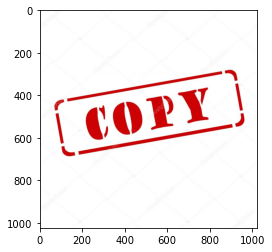

In [138]:
plt.imshow(small_img)

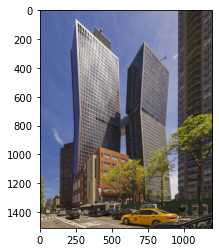

In [139]:
plt.imshow(large_img)

In [140]:
# resizing the small image
small_img = cv2.resize(small_img, (600, 600))

In [141]:
small_img.shape

(600, 600, 3)

In [142]:
large_img.shape

(1510, 1200, 3)

In [143]:
# creating offsets
x_offset = 1200 - 600
y_offset = 1510 - 600

In [144]:
(rows, cols, channels) = small_img.shape

In [145]:
rows

600

In [146]:
roi = large_img[y_offset:1510, x_offset:1200] # (Y,X)

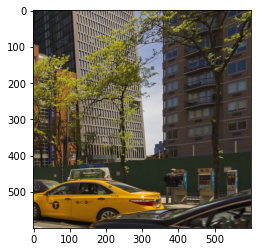

In [147]:
plt.imshow(roi)

In [148]:
# GETTING GRAY SCALE IMAGE OF SMALLER IMAGE
small_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)

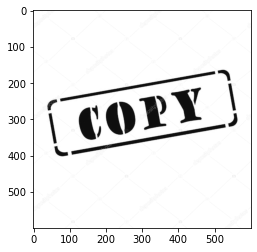

In [149]:
plt.imshow(small_gray, cmap='gray')

In [150]:
# invert the gray image
mask_inv = cv2.bitwise_not(small_gray)

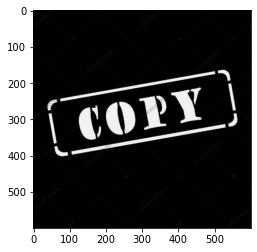

In [151]:
plt.imshow(mask_inv, cmap='gray')

In [152]:
mask_inv.shape

(600, 600)

In [153]:
# this no longer contains the channel

We need to add this mask to all the three color channels

In [154]:
import numpy as np

In [155]:
white_bg = np.ones((600, 600, 3), dtype=np.int16)

In [156]:
white_bg = white_bg * 255

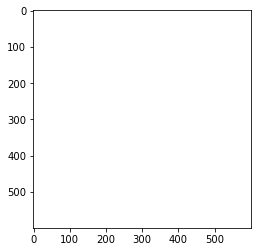

In [157]:
plt.imshow(white_bg)

## Alternatively

white_background = np.full(small_img.shape, 255, dtype=np.int16)

plt.imshow(white_background)

In [158]:
white_bg.shape

(600, 600, 3)

In [163]:
# creating the mask
bg = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv)

In [164]:
bg.shape

(600, 600, 3)

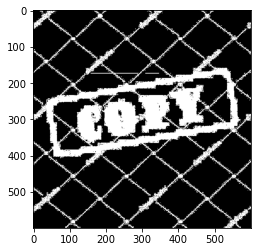

In [165]:
plt.imshow(bg)

In [166]:
fg = cv2.bitwise_or(small_img, small_img, mask=mask_inv)

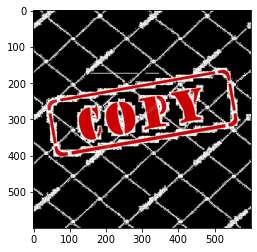

In [167]:
plt.imshow(fg)

In [168]:
final_img = cv2.bitwise_or(roi, fg)

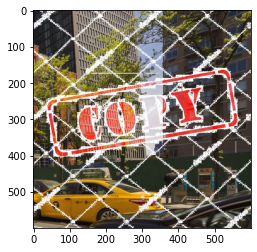

In [170]:
plt.imshow(final_img)

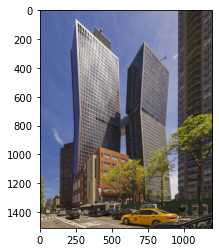

In [171]:
plt.imshow(large_img)

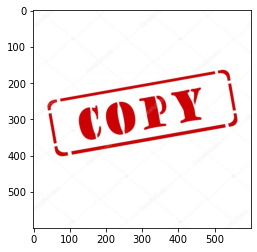

In [172]:
plt.imshow(small_img)

In [173]:
large_img[y_offset:y_offset + final_img.shape[1], x_offset:x_offset + final_img.shape[0]] = final_img

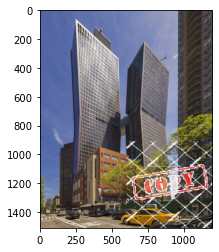

In [174]:
plt.imshow(large_img)